# **"From Web Scraping to Machine Learning: Understanding Panama City's Real Estate with Python"**

## **2. Data Cleaning**
Raw data is often full of potential but requiring careful refinement. In this phase, we meticulously clean the dataset, addressing missing values, outliers, and inconsistencies. Our aim is to ensure that the subsequent analysis is built upon a solid, reliable foundation.

**Step 1 - Read the data from GitHub repository**

In [30]:
import pandas as pd
property_data = pd.read_csv('https://raw.githubusercontent.com/eiig26/public_data/main/property_data_final.csv')

property_data.head()

,Name,Latitude,Longitude,Type,Status,Category,Size,Rooms,Bathrooms,Price,Info_url,image_url
0,Proyecto Sevilla,8.939443,-79.642349,Residencial,En Construcción,Apartamentos,90m2,2,1.5,"$120,000",https://www.acobir.com/proyectos/list/proyecto...,https://www.acobir.com/site/assets/files/2023/...
1,Torres de España,0.000000,0.000000,Residencial,Proyecto a Estrenar,Apartamentos,"70,14m2",3,1.5,"$82,798",https://www.acobir.com/proyectos/list/torres-d...,https://www.acobir.com/site/assets/files/2023/...
2,PH Demetra,NaN,NaN,Residencial,Proyecto a Estrenar,Apartamentos,72m2,2,2.0,"$165,000",https://www.acobir.com/proyectos/list/ph-demetra/,https://www.acobir.com/site/assets/files/2023/...
3,ALEXA,8.985181,-79.515607,Residencial,Pre-Venta,Apartamentos,"48,5m2",1,1.0,"$104,300",https://www.acobir.com/proyectos/list/alexa/,https://www.acobir.com/site/assets/files/2022/...
4,Torres de Castilla,8.999227,-79.517293,Residencial,Proyecto a Estrenar,Apartamentos,86m2,2,2.0,"$179,900",https://www.acobir.com/proyectos/list/torres-d...,https://www.acobir.com/site/assets/files/2022/...


**Step #2 - Translate the values from Spanish to English**

In [31]:
#Get the unique values of each text columns
print(property_data['Type'].unique())
print(property_data['Status'].unique())
print(property_data['Category'].unique())

#Change the spanish texts to english texts
property_data['Type'] = property_data['Type'].replace('Residencial', 'Residential')
property_data['Status'] = property_data['Status'].replace('Proyecto a Estrenar', 'Brand new project').replace('En Construcción', 'Under Construction').replace('Pre-Venta', 'Pre-Sale')
property_data['Category'] = property_data['Category'].replace('Apartamentos', 'Apartment')

#Display our work
property_data.head()

property_data.info()

['Residencial']
['En Construcción' 'Proyecto a Estrenar' 'Pre-Venta']
['Apartamentos']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       63 non-null     object 
 1   Latitude   59 non-null     float64
 2   Longitude  59 non-null     float64
 3   Type       63 non-null     object 
 4   Status     63 non-null     object 
 5   Category   63 non-null     object 
 6   Size       63 non-null     object 
 7   Rooms      63 non-null     int64  
 8   Bathrooms  63 non-null     float64
 9   Price      63 non-null     object 
 10  Info_url   63 non-null     object 
 11  image_url  63 non-null     object 
dtypes: float64(3), int64(1), object(8)
memory usage: 6.0+ KB


**Step #3 - Data transformation: Cleaning Price and Size, and handling missing coordinates**

In [32]:
#Clean unit values in Price and Size
property_data['Size'] = property_data['Size'].str.replace('m2', '').str.replace(',', '.').astype(float)

property_data['Price'] = property_data['Price'].str.replace("$", '').str.replace(',', '').astype(int)


#Change missing values in coordinates
property_data['Latitude'].fillna(0.000, inplace=True)
property_data['Longitude'].fillna(0.000, inplace=True)

#Display our work
property_data.head()



<ipython-input-32-ce6d2dbfc88e>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  property_data['Latitude'].fillna(0.000, inplace=True)
<ipython-input-32-ce6d2dbfc88e>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

,Name,Latitude,Longitude,Type,Status,Category,Size,Rooms,Bathrooms,Price,Info_url,image_url
0,Proyecto Sevilla,8.939443,-79.642349,Residential,Under Construction,Apartment,90.00,2,1.5,120000,https://www.acobir.com/proyectos/list/proyecto...,https://www.acobir.com/site/assets/files/2023/...
1,Torres de España,0.000000,0.000000,Residential,Brand new project,Apartment,70.14,3,1.5,82798,https://www.acobir.com/proyectos/list/torres-d...,https://www.acobir.com/site/assets/files/2023/...
2,PH Demetra,0.000000,0.000000,Residential,Brand new project,Apartment,72.00,2,2.0,165000,https://www.acobir.com/proyectos/list/ph-demetra/,https://www.acobir.com/site/assets/files/2023/...
3,ALEXA,8.985181,-79.515607,Residential,Pre-Sale,Apartment,48.50,1,1.0,104300,https://www.acobir.com/proyectos/list/alexa/,https://www.acobir.com/site/assets/files/2022/...
4,Torres de Castilla,8.999227,-79.517293,Residential,Brand new project,Apartment,86.00,2,2.0,179900,https://www.acobir.com/proyectos/list/torres-d...,https://www.acobir.com/site/assets/files/2022/...


**Step #4 - Outlier detection and handling**

Using the **Z-score** method with this formula:
`z = (x - μ) / σ `

*x = data point*  
*μ = mean   *   
*σ = standard deviation *

*A Z-score of 3 indicates that the data point is 3 standard deviations away from the mean.*

In [33]:
import numpy as np
from scipy import stats

# Calculate Z-scores
z_scores = stats.zscore(property_data['Price'])

# Define a threshold
threshold = 3

# Identify outliers
outliers = (np.abs(z_scores) > threshold)

df_outliers = property_data[outliers]
df_outliers = property_data[outliers].copy()
df_outliers['Z_Score_Price'] = z_scores[outliers]
df_outliers = df_outliers.drop(columns='Info_url')
df_outliers = df_outliers.drop(columns='image_url')

# Display the DataFrame with outliers
df_outliers

,Name,Latitude,Longitude,Type,Status,Category,Size,Rooms,Bathrooms,Price,Z_Score_Price
35,PH TEN TOWER - COSTA DEL ESTE,9.010180,-79.469281,Residential,Brand new project,Apartment,419.00,2,3.5,975000,3.670608
40,Ocean Front,8.974401,-79.512600,Residential,Brand new project,Apartment,320.78,3,3.5,913400,3.364228
48,Greenview,9.025781,-79.464696,Residential,Brand new project,Apartment,314.00,3,3.5,847800,3.037952
57,Paramount,9.011043,-79.468306,Residential,Brand new project,Apartment,313.00,3,3.5,950000,3.546265


**Step #5 - Remove the outliers**

In [34]:
c_property_data = property_data[~outliers]
num_rows, num_columns = c_property_data.shape

# Print the results
print(f"Number of rows: {num_rows}")


Number of rows: 59


**Step #6 - Remove the Projects outside of Panama City**

In [35]:
#Remove the projects with a Longitude coordinate less than 79.6
c_property_data = c_property_data[c_property_data['Longitude'] >= -79.6]

## **3. Data Visualization:**

Armed with a cleaned dataset, our exploration takes a visual journey through the rich mosaic of Panama City's real estate. We use visualizations and statistical insights as our tools, seeking to unveil the relationship between apartment features and prices.




**Step #1 - Create a Map for all the Projects**

In [36]:
import folium
from folium import Popup

c_property_data_map = c_property_data[c_property_data['Longitude'] != 0]

c_property_data_map
#Build the map with the coordinates
propertymap = folium.Map(location=[c_property_data_map['Latitude'].iloc[0], c_property_data_map['Longitude'].iloc[0]], zoom_start=12)

# Add markers for each row in the DataFrame
for index, row in c_property_data_map.iterrows():
    popup_content = f"<img src='{row['image_url']}' alt='Image' width='150'><br>{row['Name']}"
    popup = Popup(popup_content, max_width=300)
    folium.Marker(location=[row['Latitude'], row['Longitude']], popup=popup).add_to(propertymap)

propertymap

**Step #2 -  Analyze the distribution of prices**




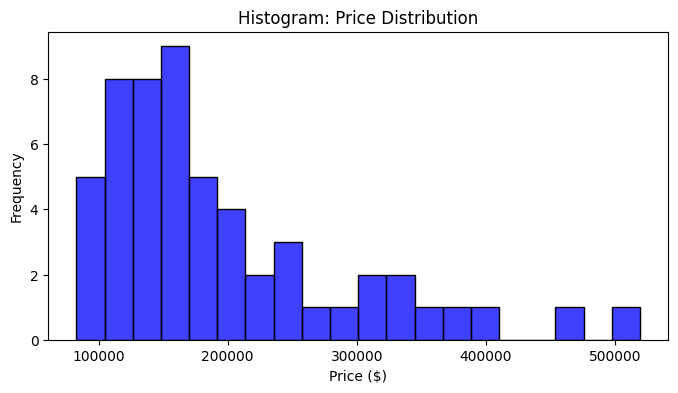

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

#Create a Histogram of Price
plt.figure(figsize=(8, 4))
sns.histplot(c_property_data['Price'], bins=20, color='blue')
plt.title('Histogram: Price Distribution')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

**Analysis:** The x-axis shows prices from 0 to approximately 500,000. The histogram is skewed to the right,  meaning there are a higher frequency of items at lower prices and fewer as the price increases. The most common price range appears to be between 100,000 to 150,000.The frequencies decrease as the price increases, with the lowest frequency being 1 for the highest price bin.


**Step #3 - Analyze the distribution of sizes**

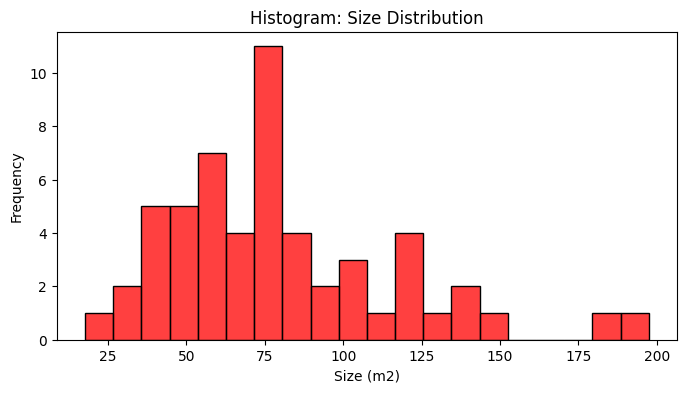

In [38]:
plt.figure(figsize=(8, 4))
sns.histplot(c_property_data['Size'], bins=20, color='red')
plt.title('Histogram: Size Distribution')
plt.xlabel('Size (m2)')
plt.ylabel('Frequency')
plt.show()

**Analysis:** The x-axis shows sizes from 0 to approximately 200 square meters. The histogram is skewed to the right,  meaning there are a higher frequency of items at lower sizes and fewer as the size increases. The most common size range appears in 75 m2.The frequencies decrease as the size increases, with the lowest frequency being 1 for the highests size bins.


**Step #4 - Analyze the impact of the status in the price**

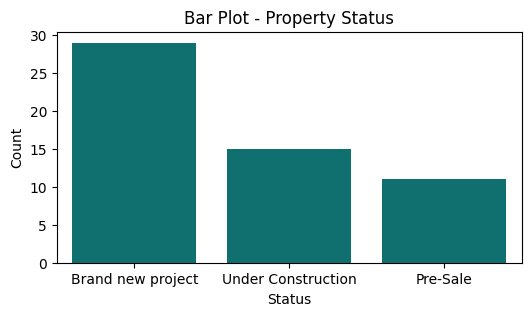

Status Report
Status
Brand new project     29
Under Construction    15
Pre-Sale              11
Name: count, dtype: int64


In [39]:
#Create a bar plot with the count of the projects per status
status_counts = c_property_data['Status'].value_counts()
plt.figure(figsize=(6, 3))
sns.barplot(x=status_counts.index, y=status_counts.values, color = "teal")
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Bar Plot - Property Status')
plt.xticks(rotation=0, ha='center')
plt.show()
print("Status Report")
print(status_counts)

**Analysis:** The chart illustrates the distribution of projects across three statuses, highlighting "Brand new project" as the predominant status with the highest project count, totaling 29.

<ipython-input-40-0e992e94c092>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Status', y='Price', data=c_property_data, palette='Set2')


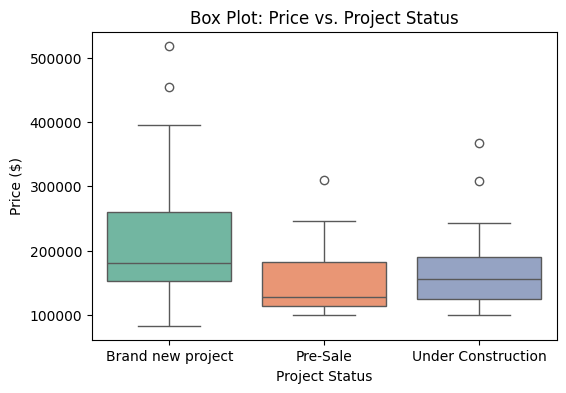

In [40]:
#Build a box plot with the distribution of the Price peer each Status
plt.figure(figsize=(6, 4))
sns.boxplot(x='Status', y='Price', data=c_property_data, palette='Set2')
plt.title('Box Plot: Price vs. Project Status')
plt.xlabel('Project Status')
plt.ylabel('Price ($)')
plt.show()

**Analysis:** This graph show 3 boxes each representing the interquartile range (IQR) for the price at each project status. The Under Construction box is a relatively small IQR, indicating less variability in price. The median is around 150,000. Brand New Project box has a larger IQR, suggesting greater variability in price. The median is higher than that other boxes, approximately 250,000. Pre-Sale box have a IQR between the other two in size, with a median that appears to be lower than the 'Brand new project' but higher than 'Under Construction'. The plot shows several outlier points, for the 'Brand new project' and 'Under Construction' there are outliers on the upper range, indicating some prices are significantly higher than the rest. In conclusion, we can suggest that 'New Project' has mean of higher prices than 'Under Construction' and 'Pre-Sale' statuses.

**Step #5 - Analyze the relationship between Price and Size**

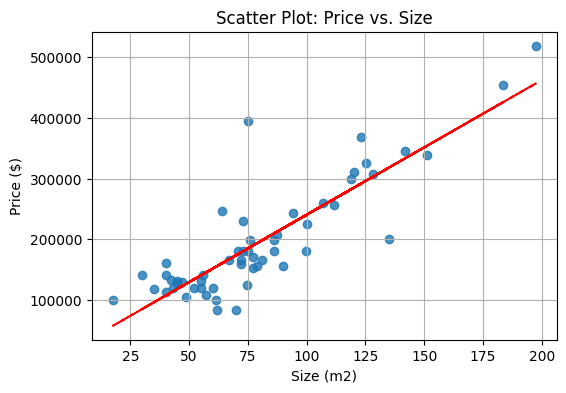

Correlation Coefficient =  0.8612113258258116


In [41]:
#Create a scatter plot wiht Size and Price
plt.figure(figsize=(6, 4))
plt.scatter(c_property_data['Size'], c_property_data['Price'], alpha=0.8)
plt.xlabel('Size (m2)')
plt.ylabel('Price ($)')
plt.title('Scatter Plot: Price vs. Size')

#Trend line
z = np.polyfit(c_property_data['Size'], c_property_data['Price'], 1)
p = np.poly1d(z)
plt.plot(c_property_data['Size'], p(c_property_data['Size']), 'r--')

plt.grid(True)
plt.show()

#Calculating the correlation
correlation = np.corrcoef(c_property_data['Size'], c_property_data['Price'])

#Show the correlation coefficient
correlation_coefficient = correlation[0, 1]
print("Correlation Coefficient = ", correlation_coefficient)

**Analysis:** This scatter plot shows that there is likely a strong positive correlation between the size of a property and its price, meaning larger properties tend to be more expensive. The correlation coefficient, denoted as approximately 0.8424 indicates a strong positive relationship between 'Size' and 'Price.

## **4. Machine Learning:**

Our story's challenge arrives with machine learning. Using regression models, we predict apartment prices based on key features: location, room and bathroom count, size, status, and actual price. These predictions show current pricing dynamics and guide future property valuation.

In this process, we decode relationships between features and prices. The best part is a scatter plot, comparing actual to predicted prices—a visual focus to our model's force in discover Panama City's property market language.

**Step #1 - Build the Regression Model (Machine Learning)**

In [49]:
import statsmodels.api as sm
#Prepare columns for the variable Status
# Convert categorical columns to one-hot encoding
property_data_encoded = pd.get_dummies(c_property_data, columns=['Status'])

# Ensure all dummy columns are integers (0 and 1)
property_data_encoded[['Status_Brand new project', 'Status_Pre-Sale', 'Status_Under Construction']] = property_data_encoded[['Status_Brand new project', 'Status_Pre-Sale', 'Status_Under Construction']].astype(int)


In [50]:
#Values for the model
selected_features = ['Latitude', 'Longitude', 'Size', 'Rooms', 'Bathrooms', 'Status_Brand new project', 'Status_Pre-Sale', 'Status_Under Construction']
target_variable = ['Price']

X = sm.add_constant(property_data_encoded[selected_features])
y = c_property_data[target_variable]

X = X.dropna()
y = y.dropna()

#Build the model
model = sm.OLS(y, X).fit()


**Step #2 - get the summary table of the model**

In [51]:
# Create a summary table
summary_table = model.summary()

# Extract the relevant information
table_data = summary_table.tables[1]

# Convert the table data to a DataFrame for better formatting
table_df = pd.DataFrame(table_data.data[1:], columns=table_data.data[0])

# Display the table
table_df

,,coef,std err,t,P>|t|,[0.025,0.975]
0,const,9685.1195,2.34e+04,0.415,0.680,-3.73e+04,5.67e+04
1,Latitude,-5.321e+05,1.86e+05,-2.866,0.006,-9.06e+05,-1.59e+05
2,Longitude,-6.046e+04,2.11e+04,-2.870,0.006,-1.03e+05,-1.81e+04
3,Size,2589.8143,284.582,9.100,0.000,2017.309,3162.319
4,Rooms,-1.899e+04,1.23e+04,-1.538,0.131,-4.38e+04,5845.029
5,Bathrooms,2845.5290,1.8e+04,0.158,0.875,-3.33e+04,3.9e+04
6,Status_Brand new project,-1917.5116,1.17e+04,-0.164,0.870,-2.54e+04,2.16e+04
7,Status_Pre-Sale,1.025e+04,1.23e+04,0.835,0.408,-1.44e+04,3.49e+04
8,Status_Under Construction,1352.2565,1.34e+04,0.101,0.920,-2.56e+04,2.84e+04


**Analysis:** this table show the summary of the model, highligthing two columns, coef (Coefficients): This column shows the estimated effect each variable, and P>|t| (P-value) that indicate if is statistically significant. Following this, the coefficient for latitude is negative and statistically significant (p = 0.006), suggesting that moving north is associated with a decrease in price.The coefficient for longitude is also negative and statistically significant (p = 0.006), which implies that moving east is associated with a decrease in price. Size has a positive coefficient that is statistically significant, indicating that an increase in size is associated with an increase in price. Rooms and bathrooms the coefficient is negative but not statistically significant, suggesting that the number of rooms and bathrooms does not have a significant effect on the price. Status_Brand new project has a positive coefficient suggesting that brand new projects are associated with an increase in price, but it's not statistically significant.Status_Pre-Sale has a positive coefficient, which is not statistically significant. Status_Under Construction has a negative coefficient, suggesting an association with a decrease in price, but it is also not statistically significant.

In summary, this regression model indicates that latitude and longitude are statistically significant predictors of price, with more northern and eastern locations associated with lower prices. The size of the property is a strong predictor of higher prices. The other variables, such as the number of rooms, bathrooms, and the construction status of the property, are not statistically significant predictors of price in this model.

**Step #3 - Predict Values using the Model**

In [52]:
y_pred = model.predict(X)

# Add the predicted values to  DataFrame as 'PE_pred'

c_property_data.loc[:, 'Price_pred'] = y_pred
c_property_data = c_property_data.drop(columns='Info_url')
c_property_data = c_property_data.drop(columns='image_url')
c_property_data.head()

,Name,Latitude,Longitude,Type,Status,Category,Size,Rooms,Bathrooms,Price,Price_pred
1,Torres de España,0.000000,0.000000,Residential,Brand new project,Apartment,70.14,3,1.5,82798,136724.534194
2,PH Demetra,0.000000,0.000000,Residential,Brand new project,Apartment,72.00,2,2.0,165000,161951.334515
3,ALEXA,8.985181,-79.515607,Residential,Pre-Sale,Apartment,48.50,1,1.0,104300,156048.899784
4,Torres de Castilla,8.999227,-79.517293,Residential,Brand new project,Apartment,86.00,2,2.0,179900,217486.466824
5,P.H. Epoca,9.008041,-79.504030,Residential,Brand new project,Apartment,55.00,3,2.0,130100,112723.782298


**Step #4 - Create a scatter plot for compare Prices Actual vs. Predicted**

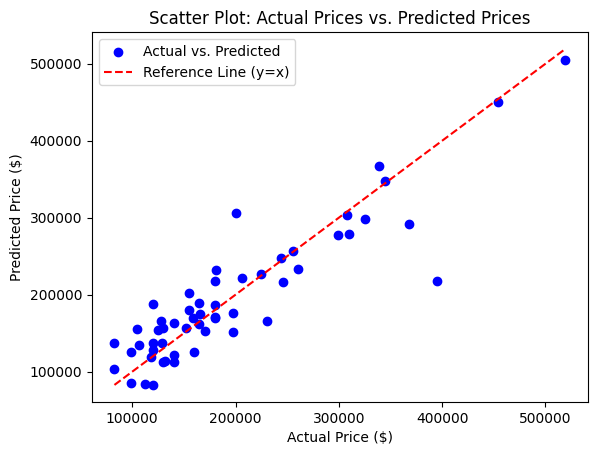

In [53]:
# Create a scatter plot
plt.scatter(c_property_data['Price'], c_property_data['Price_pred'], color='blue', marker='o', label='Actual vs. Predicted')

# Add labels and title
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title('Scatter Plot: Actual Prices vs. Predicted Prices')

# Add a diagonal line for reference (y=x)
plt.plot([min(c_property_data['Price']), max(c_property_data['Price'])], [min(c_property_data['Price']), max(c_property_data['Price'])], linestyle='--', color='red', label='Reference Line (y=x)')

# Add a legend
plt.legend()

# Show the plot
plt.show()



**Analysis:** this scatter plot show that the majority of the predictions are reasonably close to the actual prices, especially for properties with lower prices (toward the left side of the plot). The dashed red line is a reference line where y=x, meaning that any point along this line would indicate an instance where the predicted price is exactly equal to the actual price. As the actual prices increase, there is slightly more deviation from the reference line, indicating the model is less accurate for higher-priced properties.


## **5. Recommendations:**
Armed with our predictive model, we conclude our journey by recommending projects that align with the predicted market trends. Do these recommendations align with the current market reality, or do they offer a view into the future of Panama City's real estate?

In conclusion, this project aimed to develop a recommendation system for real estate projects based on a predictive model. The model was designed to predict property prices, and the recommendations were derived from the model's predictions. Here are key findings and considerations:

**Step #1 - Model Performance**


In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

#Calculate the indicators for the model performance
mae = mean_absolute_error(c_property_data['Price'], c_property_data['Price_pred'])
mse = mean_squared_error(c_property_data['Price'], c_property_data['Price_pred'])
rmse = np.sqrt(mse)

# Assign metrics to the DataFrame
df_performance = pd.DataFrame({'MAE': [mae], 'MSE': [mse], 'RMSE': [rmse]})

df_performance

,MAE,MSE,RMSE
0,28309.056509,1.639315e+09,40488.455974



**Analysis:** The values you've provided are common metrics used to evaluate the performance of a regression model:

MAE (Mean Absolute Error): This indicate on average, the model's predictions are about $28,309.06 away from the actual price. This gives an idea of the typical error magnitude.

MSE (Mean Squared Error): With an MSE of approximately 1.639 x 10^9, it indicates that the model has some relatively large errors.

RMSE (Root Mean Squared Error): RMSE of 40,488.46 indicates that the standard deviation of the prediction errors is around $40,488.46. This is generally considered a high error, particularly if you're dealing with properties where this constitutes a significant proportion of the property value.

These metrics indicate that the model have a substantial average  error per prediction. Given the context of property prices, an average error of over $28,000 might be considered high, but it also depends on the overall price range of the properties. For very expensive properties, this level of error might be acceptable, whereas for less expensive properties, it might be quite significant.

**Step #2 - Residual Analysis**

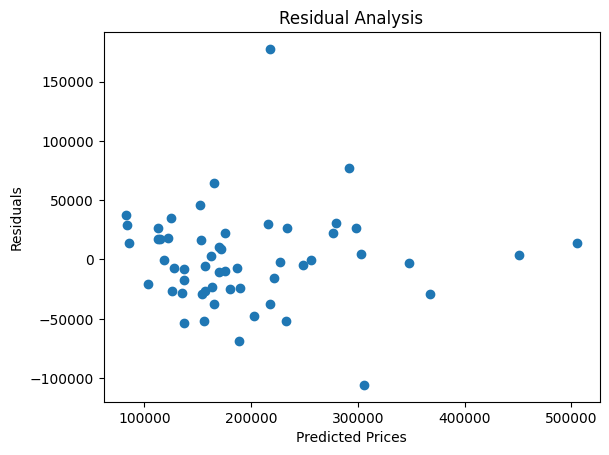

In [55]:
#Calculate the residuals
c_property_data['Residuals'] = c_property_data['Price'] - c_property_data['Price_pred']
plt.scatter(c_property_data['Price_pred'], c_property_data['Residuals'])
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()

**Analysis:** This graph indicate residuals positive and negative

**Step #3 - Recommendation Strategy**

*Method #1 - Residuals near to 0, when the Predicted Value is similar to the Actual Value*. In this case, we choose Projects with residuals less than $1,000.

In [56]:
#Select well predicted proyects
well_predicted_projects = c_property_data[abs(c_property_data['Residuals']) < 3000]

# Select relevant columns for recommended projects
recommended_projects = well_predicted_projects[['Name', "Size", 'Price', 'Price_pred','Rooms', 'Bathrooms', 'Status']]

# Display the recommended projects
recommended_projects

,Name,Size,Price,Price_pred,Rooms,Bathrooms,Status
31,El Botánico,35.0,118000,118799.475382,1,1.0,Under Construction
41,Pacific Park,142.0,345100,347890.834299,3,2.5,Brand new project
53,Portofino Towers,111.5,255700,256253.193991,3,2.0,Brand new project
55,Victoria Royale,100.0,225000,227074.212202,3,2.0,Brand new project


Method #2 - Residuals negative, when the Actual Value is less than to the Predicted Value. In this case, we choose Projects with residuals higher than $70,000

In [57]:
#Select well predicted proyects
well_predicted_projects2 = c_property_data[c_property_data['Residuals'] < -50000]

# Select relevant columns for recommended projects
recommended_projects2 = well_predicted_projects2[['Name', "Size", 'Price', 'Price_pred', 'Residuals','Rooms', 'Bathrooms', 'Status']].sort_values(by='Residuals', ascending=True)

# Display the recommended projects
recommended_projects2

,Name,Size,Price,Price_pred,Residuals,Rooms,Bathrooms,Status
59,Portoalegre,135.00,200000,305735.165334,-105735.165334,3,3.0,Brand new project
26,Bay View,60.00,120000,188454.719789,-68454.719789,1,1.0,Brand new project
1,Torres de España,70.14,82798,136724.534194,-53926.534194,3,1.5,Brand new project
3,ALEXA,48.50,104300,156048.899784,-51748.899784,1,1.0,Pre-Sale
33,PH Sabana Tower,99.70,180750,232441.243480,-51691.243480,3,2.0,Under Construction


## **Conclusion: Decoding Panama City's Real Estate**

The comprehensive analysis of 63 apartments using data science proved to be a valuable compass in navigating the landscape of Panama City's real estate. Discovering patterns and relationships, our exploration highlighted key insights that shape the narrative of property dynamics in this vibrant city.

**Size is the gamechanger:**
Among of many factors influencing apartment prices, size emerged as the main indicator. The correlation between size and price was the strongest, affirming its important role in determining property values.

**Geographical reveals:**
Latitude and Longitude unveiled their influence. Apartments located in the North and East regions exhibited lower prices, offering a geographical dimension to our understanding of the market.

**Model Reflections:**
As we ventured into the field of machine learning, our predictive model provided valuable insights, but it have a significant margin of error. This calls for refinement, suggesting a recalibration of the model, possibly omitting variables that aren't statistical significally.

**Residual knows:**
This project taking in consideration the residual can suggest that the projects with negative residuals become in interesting prospects, presenting an opportunity to begin the search of the dream apartment at an optimal price.

In conclusion, my project not only dissected the quantitative variables of Panama City's real estate but also unveiled avenues for personalized exploration. Armed with these insights, future endeavors can navigate the dynamic market with a others focuses, uncovering new opportunities with statistical models. The journey from data analysis to machine learning has not only uncovered the kmowledge of property valuation but also set the stage for informed and personalized decision-making in the pursuit of the perfect home.